<a href="https://colab.research.google.com/github/Likelipop/See_image_processing/blob/main/Lab_o4%5CWeek4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import urllib.request # Used to download the image
import gdown # Used to download the image
from scipy import ndimage


In [1]:
!git clone "https://github.com/Likelipop/See_image_processing.git"

Cloning into 'See_image_processing'...
remote: Enumerating objects: 86, done.
remote: Counting objects: 100% (86/86), done.
remote: Compressing objects: 100% (82/82), done.
remote: Total 86 (delta 22), reused 7 (delta 0), pack-reused 0 (from 0)
Receiving objects: 100% (86/86), 38.21 MiB | 13.44 MiB/s, done.
Resolving deltas: 100% (22/22), done.


In [2]:
sea_path = "/content/See_image_processing/Lab_04/Image/Sea.jpg"
bliss_path = "/content/See_image_processing/Lab_04/Image/bliss.jpg"
hall_path = "/content/See_image_processing/Lab_04/Image/hall.jpg"

In [5]:
# Load the image
image = cv2.imread(sea_path, cv2.IMREAD_GRAYSCALE)
house = cv2.imread(hall_path, cv2.IMREAD_GRAYSCALE)

# Edge detection

Edge detection includes a variety of mathematical methods that aim at identifying edges, defined as curves in a digital image at which the image brightness changes sharply or, more formally, has discontinuities. The same problem of finding discontinuities in one-dimensional signals is known as step detection and the problem of finding signal discontinuities over time is known as change detection. Edge detection is a fundamental tool in image processing, machine vision and computer vision, particularly in the areas of feature detection and feature extraction.

#  Using First Order Derivative Methods in Edge Detection

**Using defaut kernel**

Different gradient operators can be applied to estimate image gradients from the input image or a smoothed version of it. The simplest approach is to use central differences:

$
L_x(x, y) = -\frac{1}{2} L(x-1, y) + 0 \cdot L(x, y) + \frac{1}{2} L(x+1, y)
$

$
L_y(x, y) = -\frac{1}{2} L(x, y-1) + 0 \cdot L(x, y) + \frac{1}{2} L(x, y+1)
$


**1.Finite Difference Approximations**

**Formulas:**

$$
\frac{\partial I}{\partial x} \approx \frac{1}{2} \left( \left(I_{i+1,j+1} - I_{i,j+1}\right) + \left(I_{i+1,j} - I_{i,j}\right) \right)
$$

$$
\frac{\partial I}{\partial y} \approx \frac{1}{2} \left( \left(I_{i+1,j+1} - I_{i+1,j}\right) + \left(I_{i,j+1} - I_{i,j}\right) \right)
$$

### Illustration:

| $I_{i,j}$        | $I_{i+1,j}$          |
|-------------------|----------------------|
| $I_{i,j+1}$       | $I_{i+1,j+1}$        |

$\epsilon$: Spacing between grid points.


In [7]:
kernel_defaut_x = np.array([[-1,1],
                            [-1,1]], dtype=np.float32)

kernel_defaut_y = np.array([[1, 1],
                          [-1,-1]], dtype=np.float32)

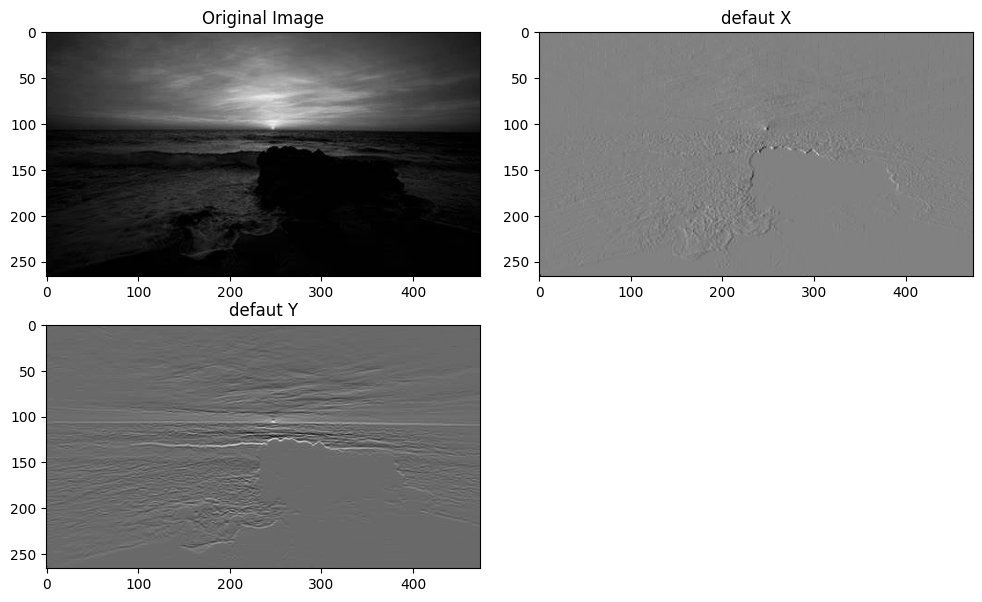

In [8]:
# Apply defaut kernel operator in X and Y directions
defautx = cv2.filter2D(image, cv2.CV_64F, kernel_defaut_x)
defauty =  cv2.filter2D(image, cv2.CV_64F, kernel_defaut_y)

# Combine gradients
# kernel_defaut_combined = cv2.magnitude(kernel_defaut_x.astype(float), kernel_defaut_y.astype(float))

# Display results
plt.figure(figsize=(10, 6))

plt.subplot(2, 2, 1), plt.imshow(image, cmap='gray'), plt.title('Original Image')
plt.subplot(2, 2, 2), plt.imshow(defautx, cmap='gray'), plt.title('defaut X')
plt.subplot(2, 2, 3), plt.imshow(defauty, cmap='gray'), plt.title('defaut Y')
# plt.subplot(2, 2, 4), plt.imshow(kernel_defaut_combined, cmap='gray'), plt.title('defaut Combined')

plt.tight_layout()  # Adjust subplot parameters for a tight layout
plt.show()

**2. Sobel Operator**

The **Sobel operator** applies weighted smoothing to the image and uses two 3x3 convolution kernels for computing gradients in the horizontal (x) and vertical (y) directions.

**Kernels:**
$$
G_x =
\begin{bmatrix}
-1 & 0 & +1 \\
-2 & 0 & +2 \\
-1 & 0 & +1
\end{bmatrix}
\quad
G_y =
\begin{bmatrix}
-1 & -2 & -1 \\
0 & 0 & 0 \\
+1 & +2 & +1
\end{bmatrix}
$$


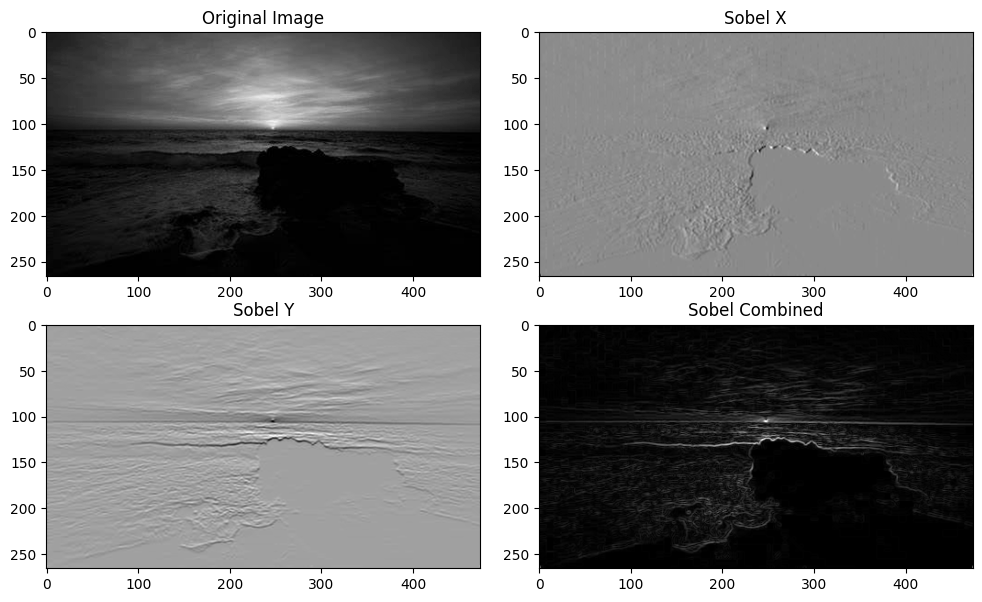

In [9]:
# Apply Sobel operator in X and Y directions
sobelx = cv2.Sobel(image, cv2.CV_64F, 1, 0, ksize=3)
sobely = cv2.Sobel(image, cv2.CV_64F, 0, 1, ksize=3)

# Combine gradients
sobel_combined = cv2.magnitude(sobelx, sobely)

# Display results
plt.figure(figsize=(10, 6))

plt.subplot(2, 2, 1), plt.imshow(image, cmap='gray'), plt.title('Original Image')
plt.subplot(2, 2, 2), plt.imshow(sobelx, cmap='gray'), plt.title('Sobel X')
plt.subplot(2, 2, 3), plt.imshow(sobely, cmap='gray'), plt.title('Sobel Y')
plt.subplot(2, 2, 4), plt.imshow(sobel_combined, cmap='gray'), plt.title('Sobel Combined')

plt.tight_layout()  # Adjust subplot parameters for a tight layout
plt.show()

**3.Robert Operator**

This gradient-based operator computes the sum of squares of the differences between diagonally adjacent pixels in an image through discrete differentiation. Then the gradient approximation is made. It uses the following 2 x 2 kernels or masks

**Kernels:**
$$
G_x =
\begin{bmatrix}
1 & 0  \\
0 & -1
\end{bmatrix}
\quad
G_y =
\begin{bmatrix}
0 & 1  \\
-1 & 0
\end{bmatrix}
$$

In [10]:
kernel_Robert_x = np.array([[1,0],
                            [0,-1]], dtype=np.float32)

kernel_Robert_y = np.array([[0, 1],
                          [-1,0]], dtype=np.float32)

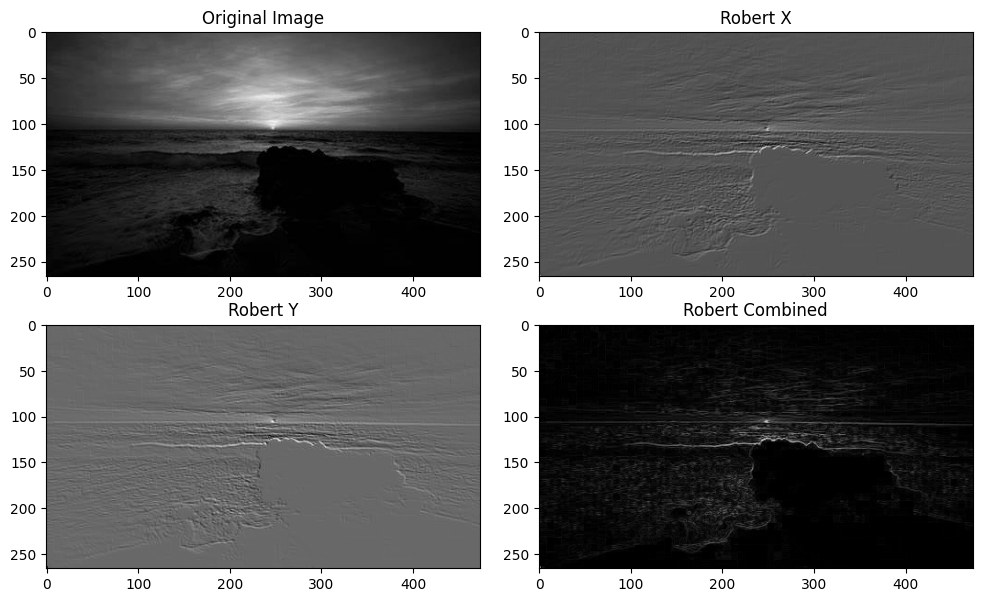

In [11]:
# Apply Sobel operator in X and Y directions
Robertx = cv2.filter2D(image, cv2.CV_64F,kernel_Robert_x)
Roberty = cv2.filter2D(image, cv2.CV_64F,kernel_Robert_y)

# Combine gradients
Robert_combined = cv2.magnitude(Robertx, Roberty)

# Display results
plt.figure(figsize=(10, 6))

plt.subplot(2, 2, 1), plt.imshow(image, cmap='gray'), plt.title('Original Image')
plt.subplot(2, 2, 2), plt.imshow(Robertx, cmap='gray'), plt.title('Robert X')
plt.subplot(2, 2, 3), plt.imshow(Roberty, cmap='gray'), plt.title('Robert Y')
plt.subplot(2, 2, 4), plt.imshow(Robert_combined, cmap='gray'), plt.title('Robert Combined')

plt.tight_layout()  # Adjust subplot parameters for a tight layout
plt.show()

**Prewitt Operator**

The Prewitt operator is a simpler, faster method that applies uniform convolution kernels to calculate gradients in the x and y directions.

Kernels:
$$
G_x =
\begin{bmatrix}
-1 & 0 & +1 \\
-1 & 0 & +1 \\
-1 & 0 & +1
\end{bmatrix}
\quad
G_y =
\begin{bmatrix}
-1 & -1 & -1 \\
0 & 0 & 0 \\
+1 & +1 & +1
\end{bmatrix}
$$


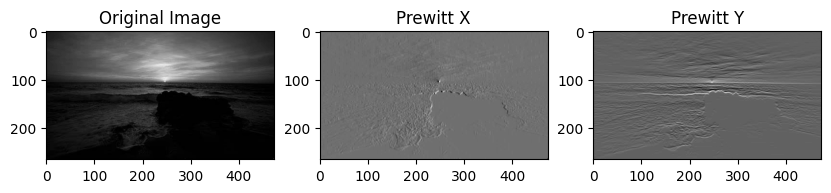

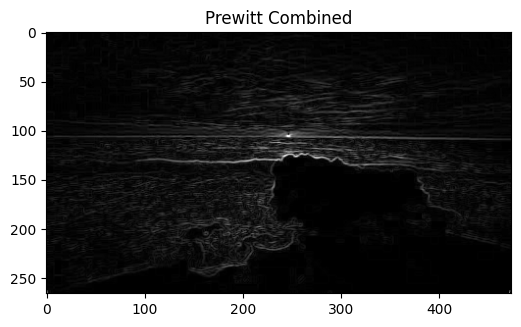

In [12]:
prewittx_kernel = np.array([[1, 0, -1], [1, 0, -1], [1, 0, -1]])
prewitty_kernel = np.array([[1, 1, 1], [0, 0, 0], [-1, -1, -1]])

prewittx = cv2.filter2D(image, cv2.CV_64F, prewittx_kernel)
prewitty = cv2.filter2D(image, cv2.CV_64F, prewitty_kernel)

prewitt_combined = cv2.magnitude(prewittx.astype(float), prewitty.astype(float))

plt.figure(figsize=(10,6))
plt.subplot(1, 3, 1), plt.imshow(image, cmap='gray'), plt.title('Original Image')
plt.subplot(1, 3, 2), plt.imshow(prewittx, cmap='gray'), plt.title('Prewitt X')
plt.subplot(1, 3, 3), plt.imshow(prewitty, cmap='gray'), plt.title('Prewitt Y')
plt.figure(figsize=(6,6))
plt.imshow(prewitt_combined, cmap='gray'), plt.title('Prewitt Combined')
plt.show()

#  Using Second Order Derivative Methods in Edge Detection

**Discrete Laplacian (∇²) Operator**

\begin{bmatrix}
I_{i-1, j+1} & I_{i, j+1} & I_{i+1, j+1} \\
I_{i-1, j} & I_{i, j} & I_{i+1, j} \\
I_{i-1, j-1} &I_{i, j-1} & I_{i+1, j-1}
\end{bmatrix}

Finite difference approximations:

$
\frac{\partial^2 I}{\partial x^2} \approx \frac{1}{\epsilon^2} \left( I_{i-1,j} - 2I_{i,j} + I_{i+1,j} \right)
$

$
\frac{\partial^2 I}{\partial y^2} \approx \frac{1}{\epsilon^2} \left( I_{i,j-1} - 2I_{i,j} + I_{i,j+1} \right)
$

$
\therefore \nabla^2 I = \frac{\partial^2 I}{\partial x^2} + \frac{\partial^2 I}{\partial y^2}
$

Convolution Mask:

$
\nabla^2 \approx \frac{1}{\epsilon^2}
\begin{bmatrix}
0 & 1 & 0 \\
1 & -4 & 1 \\
0 & 1 & 0
\end{bmatrix}
$
$
\quad \text{OR} \quad
\nabla^2 \approx \frac{1}{6\epsilon^2}
\begin{bmatrix}
1 & 4 & 1 \\
4 & -20 & 4 \\
1 & 4 & 1
\end{bmatrix} \quad \text{(More Accurate)}
$


In [13]:
def apply_laplacian(img, kernel_size=(3, 3), scale=0):
    """
    Apply Gaussian blur and Laplacian edge detection to an image.

    Parameters:
        image (numpy.ndarray): The input image to process.
        kernel_size (tuple): The kernel size for the Gaussian blur. Default is (3, 3).
        scale (int): The standard deviation in the X direction for Gaussian blur. Default is 0.

    Returns:
        numpy.ndarray: The processed image after applying the Laplacian operator.
    """
    # Apply Gaussian blur to reduce noise
    blurred_image = cv2.GaussianBlur(img, kernel_size, scale)

    # Apply the Laplacian operator to detect edges
    laplacian = cv2.Laplacian(blurred_image, cv2.CV_64F)

    # Convert the result to 8-bit format for visualization
    laplacian_abs = cv2.convertScaleAbs(laplacian)

    return laplacian_abs


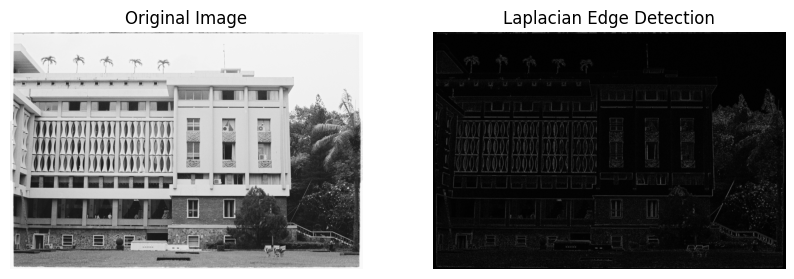

In [14]:
laplacian_abs = apply_laplacian(house)

# Display the result
plt.figure(figsize=(10, 5))

# Original image
plt.subplot(1, 2, 1)
plt.imshow(cv2.cvtColor(house, cv2.COLOR_BGR2RGB))
plt.title('Original Image')
plt.axis('off')

# Laplacian edge-detected image
plt.subplot(1, 2, 2)
plt.imshow(laplacian_abs, cmap='gray')
plt.title('Laplacian Edge Detection')
plt.axis('off')

plt.show()

**Canny edge detection**

The Canny edge detector is an edge detection operator that uses a multi-stage algorithm to detect a wide range of edges in images. It was developed by John F. Canny in 1986. Canny also produced a computational theory of edge detection explaining why the technique works. (Wikipedia)

The Canny edge detection algorithm is composed of 5 steps:

1. Noise reduction;
2. Gradient calculation;
3. Non-maximum suppression;
4. Double threshold;
5. Edge Tracking by Hysteresis.


In [15]:
# Function to detect edges in an image using Canny edge detection
def detect_edges(image_path):
    # Read the image in grayscale mode
    img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

    # Check if the image was successfully loaded
    assert img is not None, "File could not be read, check with os.path.exists()"

    # Apply Canny edge detection algorithm to the image
    edges = cv2.Canny(img, 100, 200)

    # Return the processed image with edges detected
    return edges

In [16]:
img_hysteresis = detect_edges(hall_path)

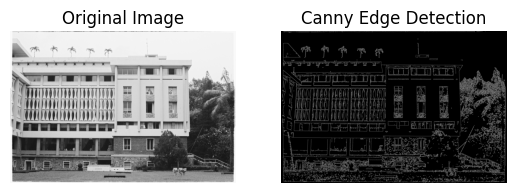

In [17]:
# Original image
plt.subplot(1, 2, 1)
plt.imshow(cv2.cvtColor(house, cv2.COLOR_BGR2RGB))
plt.title('Original Image')
plt.axis('off')

# Canny edge-detected image
plt.subplot(1, 2, 2)
plt.imshow(img_hysteresis, cmap='gray')
plt.title('Canny Edge Detection')
plt.axis('off')

plt.show()

# Homework

**Theoretical Exercises:**

1. Compare the methods of first-order derivative and applied-order derivative in edge detection. What are the advantages and disadvantages of each method?
2. List the advantages and disadvantages of the kernels used in the first-order derivative method.
3. What are the advantages of the Canny method compared to the methods mentioned above?
4. What are the applications of edge detection?

**Practical Exercises:**

1. Choose an image from external sources and apply all the methods as instructed above.
2. Choose a noisy image, then detect the edges using all the methods.
3. From the noisy image in question 2, apply any denoising method, and then detect the edges using all the methods.
4. What conclusions can be drawn from the results in questions 2 and 3?

